# DeepLearning for Audio With Python 3

## 9. How to implement a simple NN with TF

In [2]:
import numpy as np
from random import random
import tensorflow as tf
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
def generate_dataset(num_samples, test_size):
    x = np.array([[random()/2 for _ in range(2)] for _ in range(num_samples)])
    y = np.array([[i[0]+i[1]] for i in x])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = generate_dataset(5000, 0.3)

# print(f"x_test: \n {x_test}")
# print(f"y_test: \n {y_test}")

In [4]:
# build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_dim=2, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss="MSE")

2023-04-23 14:57:29.121065: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-23 14:57:29.156107: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-23 14:57:29.156250: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-23 14:57:29.158229: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-23 14:57:29.158386: I tensorflow/compile

In [12]:
# train model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
110/110 [==============================] - 0s 2ms/step - loss: 6.1538e-04
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 6.0363e-04
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 5.9270e-04
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 5.8274e-04
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 5.7333e-04
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 5.6454e-04
Epoch 7/100
110/110 [==============================] - 0s 2ms/step - loss: 5.5648e-04
Epoch 8/100
110/110 [==============================] - 0s 2ms/step - loss: 5.4883e-04
Epoch 9/100
110/110 [==============================] - 0s 2ms/step - loss: 5.4179e-04
Epoch 10/100
110/110 [==============================] - 0s 2ms/step - loss: 5.3530e-04
Epoch 11/100
110/110 [==============================] - 0s 2ms/step - loss: 5.2902e-04
Epoch 12/100
110/110 [==============================

In [6]:
# evaluate model
print("\nModel evaluation: ")
model.evaluate(x_test, y_test, verbose=1)


Model evaluation: 
47/47 [==============================] - 0s 1ms/step - loss: 5.8679e-04


0.0005867852596566081

In [7]:
# make predictions
data = np.array([[0.1, 0.2], [0.2, 0.2]])
predictions = model.predict(data)

print("\nSome predictions: ")
for d, p in zip(data, predictions):
    print(f"{d[0]} + {d[1]} = {p[0]}")

1/1 [==============================] - 0s 36ms/step

Some predictions: 
0.1 + 0.2 = 0.2987249195575714
0.2 + 0.2 = 0.3971725106239319


## 10. Understanding audio data for DL
### Sound
- Produced by the vibration of an object
- Vibrations determine oscillation of air molecules
- Alternation of air pressure causes a wave

### Fourier transform
- Decompose complex periodic sound into sum of sine waves oscillating at different frequencies

### Short Time Fourier Transform (STFT)
- Computes several FFT at different intervals
- Preserves time information
- Fixed frame size
- Gives a spectrogram (time + freq. + magnitude)

### MFCCs
- Capture timbral/textural aspects of sounds
- Freq. domain feature
- Approximate human auditory system
- 13 to 40 coefficients
- Calculated at each frame

## 11. Preprocessing audio data for DL

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
WAV_ROOT = r"/mnt/c/Users/nuyhc/Desktop/blues.00000.wav"

In [2]:
signal, sr = librosa.load(WAV_ROOT, sr=22050)

# librosa.display.waveshow(signal, sr=sr)

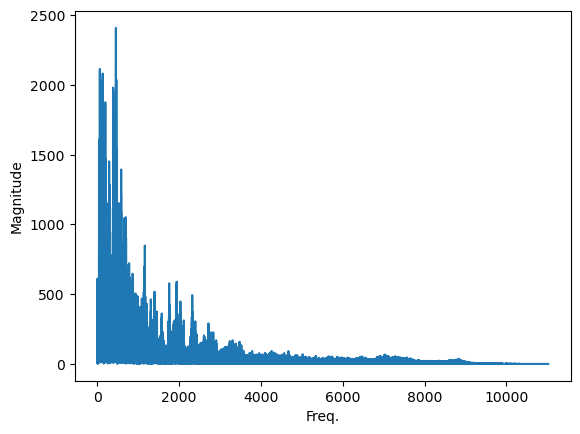

In [6]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_freq = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_freq, left_magnitude)
plt.xlabel("Freq.")
plt.ylabel("Magnitude")
plt.show()

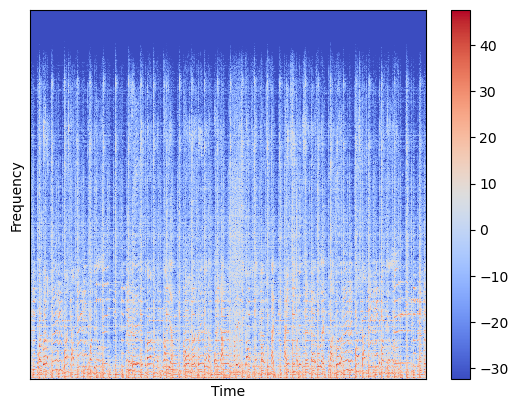

In [9]:
# stft -> spectrogram
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

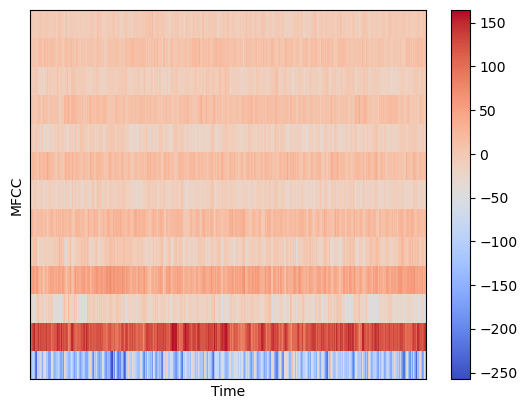

In [20]:
# MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

## 12. Music genre classification: Prepararing the dataset

In [16]:
import json
import os
import math
import librosa

DIR_PATH = r"./archive/Data"
DATASET_PATH = os.path.join(DIR_PATH, "genre_original")
JSON_PATH = os.path.join(DIR_PATH, "data.json")
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)